In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read xlsx file
raw_data = pd.read_excel("Datos_Market_copy.xlsx")
# raw_data = df.to_dict(orient="records")
raw_data.head(16)

,date,variant,pack.size,brand,supermarket,value.sales,unit.sales,volume.sales,acv.distribution
0,2021-01-09,flavoured,0 - 350 GR,brand-35,supermarket-A,9958.19,12035,3037.972,89.383171
1,2021-01-09,flavoured,0 - 350 GR,brand-35,supermarket-D,20088.69,20564,4879.200,80.172155
2,2021-01-09,flavoured,0 - 350 GR,brand-35,supermarket-C,19856.12,34003,8991.430,86.416188
3,2021-01-09,flavoured,0 - 350 GR,brand-14,supermarket-A,11797.76,11385,1657.696,98.358274
4,2021-01-09,flavoured,0 - 350 GR,brand-14,supermarket-B,2622.58,1449,318.780,61.094740
5,2021-01-09,flavoured,0 - 350 GR,brand-14,supermarket-D,9535.31,4923,1083.053,81.910020
6,2021-01-09,flavoured,0 - 350 GR,brand-14,supermarket-C,5124.99,2708,593.050,78.159464
7,2021-01-09,flavoured,0 - 350 GR,brand-3,supermarket-A,1652.75,1163,290.750,78.213839
8,2021-01-09,flavoured,0 - 350 GR,brand-3,supermarket-D,788.95,399,99.750,32.553534
9,2021-01-09,flavoured,0 - 350 GR,brand-28,supermarket-B,9.45,7,1.750,0.222648


In [3]:
print(raw_data.dtypes)

date                datetime64[ns]
variant                     object
pack.size                   object
brand                       object
supermarket                 object
value.sales                float64
unit.sales                   int64
volume.sales               float64
acv.distribution           float64
dtype: object


In [4]:
# convert date column in index column

data = raw_data.copy()
data.set_index("date", inplace=True)
data.head()

,variant,pack.size,brand,supermarket,value.sales,unit.sales,volume.sales,acv.distribution
date,,,,,,,,
2021-01-09,flavoured,0 - 350 GR,brand-35,supermarket-A,9958.19,12035,3037.972,89.383171
2021-01-09,flavoured,0 - 350 GR,brand-35,supermarket-D,20088.69,20564,4879.200,80.172155
2021-01-09,flavoured,0 - 350 GR,brand-35,supermarket-C,19856.12,34003,8991.430,86.416188
2021-01-09,flavoured,0 - 350 GR,brand-14,supermarket-A,11797.76,11385,1657.696,98.358274
2021-01-09,flavoured,0 - 350 GR,brand-14,supermarket-B,2622.58,1449,318.780,61.094740


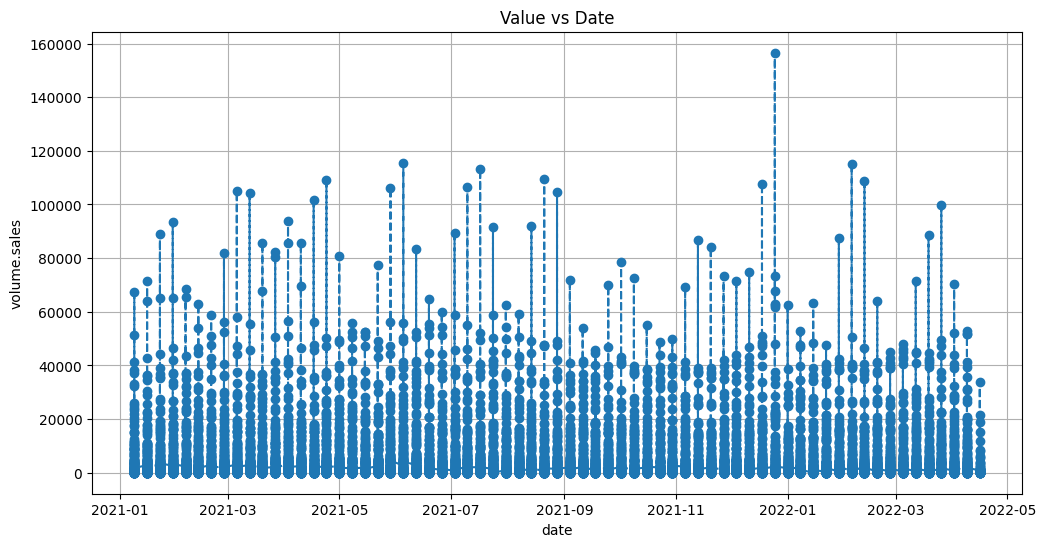

In [5]:
def plot_series(data, variable, title=None):
    plt.figure(figsize=(12, 6))
    plt.plot(data[variable], marker="o", linestyle="--")
    plt.xlabel("date")
    plt.ylabel(variable)
    plt.title(title)
    plt.grid(True)
    plt.show()


# plot of the first 100 data points
plot_series(data.head(10000), "volume.sales", title="Value vs Date")

### Testing with Compositional Variables

Transform data with CLR

In [6]:
def clr_transformation(data, columns):
    geometric_mean = data[columns].apply(
        lambda x: np.exp(np.mean(np.log(x))), axis=1
    )  # axis=1 to apply the function to each row if not it will apply to each column
    clr_trans = np.log(data[columns].div(geometric_mean, axis=0))
    return clr_trans


# apply clr transformation
clr_data = clr_transformation(
    data, ["value.sales", "unit.sales", "volume.sales", "acv.distribution"]
)

clr_data.head()

,value.sales,unit.sales,volume.sales,acv.distribution
date,,,,
2021-01-09,1.427750,1.617174,0.240545,-3.285468
2021-01-09,1.728882,1.752267,0.313706,-3.794854
2021-01-09,1.422849,1.960786,0.630609,-4.014243
2021-01-09,1.696286,1.660673,-0.266195,-3.090763
2021-01-09,1.615046,1.021761,-0.492366,-2.144442


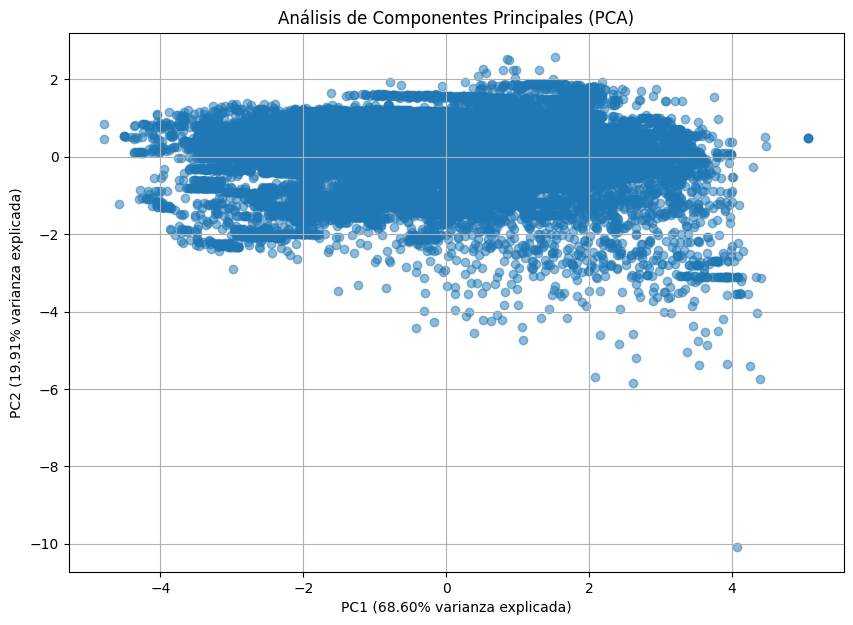

(array([0.68604111, 0.19911963]),
         PC1       PC2
 0 -0.550065 -1.448579
 1 -1.378160 -1.079548
 2 -1.775405 -2.092556
 3 -0.273641 -0.833010
 4  1.383640  0.037301)

In [7]:
# visualize the clr transformed data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalizar los datos CLR
scaler = StandardScaler()
clr_data_normalized = scaler.fit_transform(clr_data)

# Aplicar PCA
pca = PCA(n_components=2)  # Reduciendo a 2 componentes para visualización
principal_components = pca.fit_transform(clr_data_normalized)

# Varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])

# Visualizar los resultados del PCA
plt.figure(figsize=(10, 7))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.5)
plt.xlabel(f"PC1 ({explained_variance[0]:.2%} varianza explicada)")
plt.ylabel(f"PC2 ({explained_variance[1]:.2%} varianza explicada)")
plt.title("Análisis de Componentes Principales (PCA)")
plt.grid(True)
plt.show()

explained_variance, pca_df.head()

#### Starting with  Transformation Log-ratio ILR

In [8]:
# from scipy.linalg import qr

# # We have 4 components (4 supermarkets)
# components = 4

# # Generate a random matrix
# random_matrix = np.random.rand(components, components - 1)
# q, r = qr(random_matrix)

# v1, v2 = q[:, 0], q[:, 1]

# print("Vector v1:", v1)
# print("Vector v2:", v2)

In [9]:
import pandas as pd
import numpy as np
from composition_stats import ilr

# Seleccionamos las variables de ventas
sales_data = data[["value.sales", "unit.sales", "volume.sales"]]

# Be sure that is not any missing value. If not, log transformation won't work

# Apply ILR transformation
ilr_sales_data = ilr(sales_data.values)

data_reset = data.reset_index()  # data with dates out of index

# Convertimos el resultado a un DataFrame y lo agregamos al original
ilr_columns = [f"ilr_{i+1}" for i in range(ilr_sales_data.shape[1])]  # Set column names
ilr_sales_df = pd.DataFrame(
    ilr_sales_data, columns=ilr_columns, index=data_reset["date"]
)

data_ilr = pd.concat([data, ilr_sales_df], axis=1)
data_ilr.head(2)

,variant,pack.size,brand,supermarket,value.sales,unit.sales,volume.sales,acv.distribution,ilr_1,ilr_2
date,,,,,,,,,,
2021-01-09,flavoured,0 - 350 GR,brand-35,supermarket-A,9958.19,12035,3037.972,89.383171,-0.133943,1.046681
2021-01-09,flavoured,0 - 350 GR,brand-35,supermarket-D,20088.69,20564,4879.200,80.172155,-0.016536,1.165033
